In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns 

In [63]:
df_iris = pd.read_csv('..\StatistiskaMetoder\data\iris.csv') 
diamonds_df = pd.read_csv('..\StatistiskaMetoder\data\diamonds.csv')
car_df = pd.read_csv('..\StatistiskaMetoder\data\cars.csv')

In [64]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1    sepal_width   150 non-null    float64
 2    petal_length  150 non-null    float64
 3    petal_width   150 non-null    float64
 4    class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [65]:
df_iris[' class'].unique() # we can see that there are 3 different types of Iris

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [78]:
# Now I will separate so that the 3 types have a separate table each.

df_setosa = df_iris[df_iris[' class'] == 'Iris-setosa'].reset_index(drop=True)
df_versicolor = df_iris[df_iris[' class'] == 'Iris-versicolor'].reset_index(drop=True)
df_virginica = df_iris[df_iris[' class'] == 'Iris-virginica'].reset_index(drop=True)

# we can tell that each data set has a total of 50 of the 3 different types of Iris flowers
# This is good as it is equal sample sets for each type


In [88]:
# I will now look at the different types of average (mean,median and mode) for sepal length of the  setosa Iris flower.

df_setosa['sepal_length'].describe()[["mean","50%"]]


mean    5.006
50%     5.000
Name: sepal_length, dtype: float64

In [97]:
# getting the mean and median of the length of stem(sepal) for each Iris type
setosa_sep_length_mean = df_setosa["sepal_length"].mean()
setosa_sep_length_median = df_setosa["sepal_length"].median()



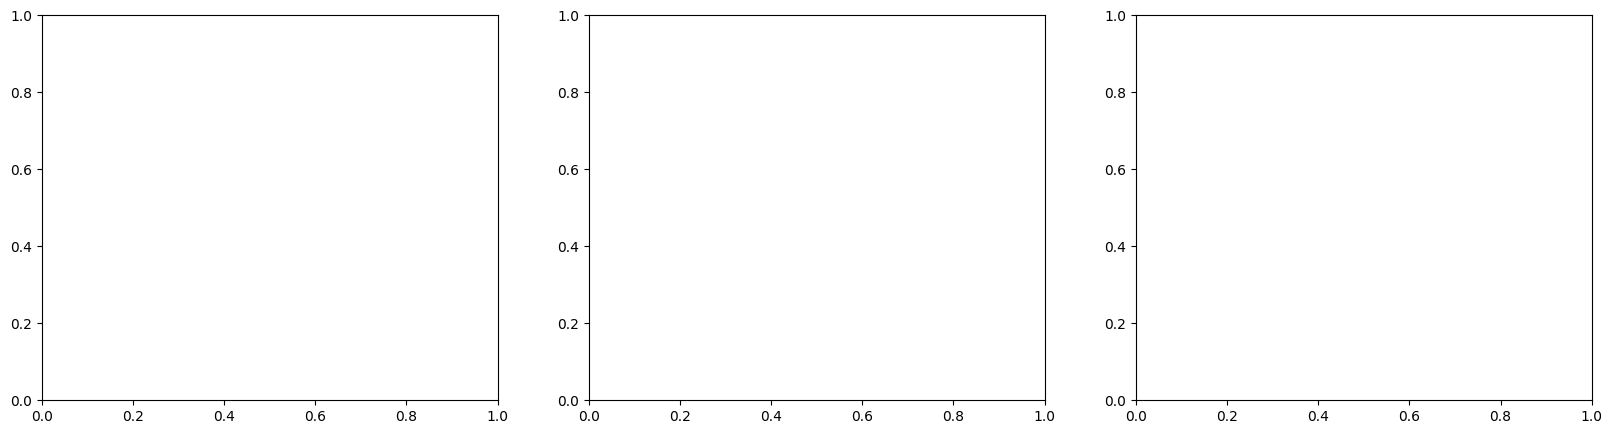

In [95]:
# plot on 3 different graphs median and mean of the stem length of each different varieties of Iris

fig, ax = plt.subplots(1,3, figsize= (20,5))

sns.histplot